# GeoPython

## Learning objectives
- Read / write spatial data from/to different file formats
- Deal with different projections
- Do different geometric operations and geocoding
- Reclassify your data based on different criteria
- Do spatial queries
- Do simple spatial analyses
- Visualize data and create (interactive) maps

## List of data analysis & visualization:
- Numpy –> Fundamental package for scientific computing with Python

- Pandas –> High-performance, easy-to-use data structures and data analysis tools

- Scipy –> A collection of numerical algorithms and domain-specific toolboxes, including signal processing, optimization and statistics

- Matplotlib –> Basic plotting library for Python

- Bokeh –> Interactive visualizations for the web (also maps)

- Plotly –> Interactive visualizations (also maps) for the web (commercial - free for educational purposes)

## GIS:
- GDAL –> Fundamental package for processing vector and raster data formats (many modules below depend on this). Used for raster processing.

- Geopandas –> Working with geospatial data in Python made easier, combines the capabilities of pandas and shapely.

- Shapely –> Python package for manipulation and analysis of planar geometric objects (based on widely deployed GEOS).

- Fiona –> Reading and writing spatial data (alternative for geopandas).

- Pyproj –> Performs cartographic transformations and geodetic computations (based on PROJ.4).

- Pysal –> Library of spatial analysis functions written in Python.

- Geopy –> Geocoding library: coordinates to address <-> address to coordinates.

- GeoViews –> Interactive Maps for the web.

- Networkx –> Network analysis and routing in Python (e.g. Dijkstra and A* -algorithms), see this post.

- Cartopy –> Make drawing maps for data analysis and visualisation as easy as possible.

- Scipy.spatial –> Spatial algorithms and data structures.

- Rtree –> Spatial indexing for Python for quick spatial lookups.

- Rasterio –> Clean and fast and geospatial raster I/O for Python.

- RSGISLib –> Remote Sensing and GIS Software Library for Python.



---


# Part 1

## Overview of Geometric objects and Shapely-module
- Point -object represents a single point in space. Points can be either two-dimensional (x, y) or three dimensional (x, y, z).

- LineString -object (i.e. a line) represents a sequence of points joined together to form a line. Hence, a line consist of a list of at least two coordinate tuples

- Polygon -object represents a filled area that consists of a list of at least three coordinate tuples that forms the outerior ring and a (possible) list of hole polygons.

- MultiPoint -object represents a collection of points and consists of a list of coordinate-tuples

- MultiLineString -object represents a collection of lines and consists of a list of line-like sequences

- MultiPolygon -object represents a collection of polygons that consists of a list of polygon-like sequences that construct from exterior ring and (possible) hole list tuples

In [1]:
from shapely.geometry import Point, LineString, Polygon

### Points

In [2]:
# Create point
point1=Point(2.2, 4.2)
point2=Point(7.2, -25.1)
point3=Point(9.26, -2.456)
point3D=Point(9.26, -2.456, 0.57)

In [3]:
# Get the type
type(point1)


shapely.geometry.point.Point

In [4]:
# Get the coordinates
point3D.coords.xy

(array('d', [9.26]), array('d', [-2.456]))

In [5]:
# What is inside?
point3D.x, point3D.y, point3D.z

(9.26, -2.456, 0.57)

## LineString

In [6]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

# It is also possible to use coordinate tuples having the same outcome
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

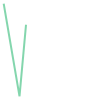

In [17]:
line2

In [7]:
print(line2)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [8]:
# Get the type
type(line)

shapely.geometry.linestring.LineString

In [9]:
# Get the coordinates
line.coords.xy

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))

In [10]:
# What is inside?
line.xy

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))

In [11]:
# Extract x corrdinates
line.xy[0], line.xy[1]

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))

In [12]:
# Get the length
line.length

52.46106912939557

In [13]:
# Get the center
c_line=line.centroid
print('Centroid of our line: ', c_line)

Centroid of our line:  POINT (6.229961354035622 -11.89241115757239)


## Polygon

In [18]:
# Create a Ploygon from corrdinates - Polygon([[p.x, p.y] for p in [point1, point2, point3]])
poly=Polygon([(-5, -5), (5, -5), (5, 5),(-5, 5)])

In [19]:
print(poly)

POLYGON ((-5 -5, 5 -5, 5 5, -5 5, -5 -5))


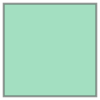

In [20]:
poly

In [21]:
# Get the type
type(poly)

shapely.geometry.polygon.Polygon

In [22]:
poly.area, poly.length, poly.centroid

(100.0, 40.0, <POINT (-0 -0)>)

In [23]:
# Geometry type can be accessed as a String
poly_type = poly.geom_type
poly_type

'Polygon'

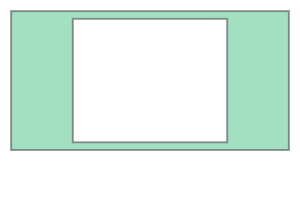

In [26]:
# Create a Polygon with a hole inside
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]
hole = [[(-100, 80), (-100, -80), (100, -80), (100, 80)]]

# World without a hole
world = Polygon(shell=world_exterior)

# NWorld with a hole
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

world_has_a_hole

POINT (-0 -0)
64800.0
(-180.0, -90.0, 180.0, 90.0)
LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
1080.0


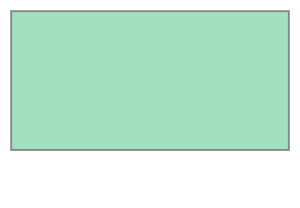

In [28]:
# Polygon attributes and functions
world_centroid=world.centroid
world_area=world.area
world_bbox=world.bounds
world_ext=world.exterior
world_length=world.length
print(world_centroid)
print(world_area)
print(world_bbox)
print(world_ext)
print(world_length)
world

## Geometry collections
- MultiPoint-object
- MultiLineString-object
- MultiPolygon-object

In [29]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

In [30]:
# Create points
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create polygon 1
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Create ploygon 2 using box() function
east_ploy_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# crate the MultiPolygen
multi_poly = MultiPolygon([west_poly, east_ploy_box])

'MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))
MultiPolygon
(-180.0, -90.0, 180.0, 90.0)
POINT (58.77551020408163 -0)
2080.0
39200.0
False


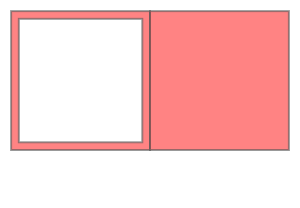

In [33]:
print("'MultiPoly: ", multi_poly)
print(multi_poly.geom_type)
print(multi_poly.bounds)
print(multi_poly.centroid)
print(multi_poly.length)
print(multi_poly.area)
print(multi_poly.is_valid)
multi_poly



---


# Part 2

### Geopandas-modules
Read and write spatial data in Python using Geopandas-module and some useful data management functionalities using either Geopandas or Pandas.

In [34]:
import geopandas as gpd

In [37]:
data=gpd.read_file("C:\\Users\\abdul\\Downloads\\Data (1)\\Data\\DAMSELFISH_distributions.shp")

In [38]:
# Data type
type(data)

geopandas.geodataframe.GeoDataFrame

In [40]:
data.head(3)

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-115.64 29.714, -115.62 29.696, -115..."
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.59 21.893, -105.56 21.851, -105..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.16 19.015, -111.16 18.999, -111..."


<Axes: >

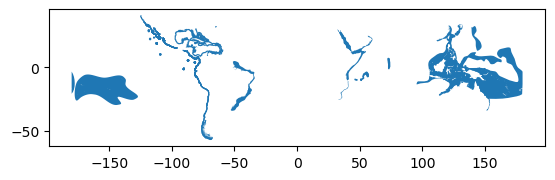

In [41]:
# Plot the file data
data.plot()

In [42]:
# The current coordinate reference system .crs
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#
### Create an output path for the data
out = r"/home/geo/Data/DAMSELFISH_distributions_SELECTION.shp"

### Select first 50 rows
selection = data[0:50]

### Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(out)

In [43]:
# Print the first five rows of the column 'geometry'
data['geometry'].head()

0    POLYGON ((-115.64 29.714, -115.62 29.696, -115...
1    POLYGON ((-105.59 21.893, -105.56 21.851, -105...
2    POLYGON ((-111.16 19.015, -111.16 18.999, -111...
3    POLYGON ((-80.865 -0.77894, -80.759 -0.83337, ...
4    POLYGON ((-67.339 -55.676, -67.338 -55.673, -6...
Name: geometry, dtype: geometry

In [46]:
# Empty column for area
data['area']=None

# Calculate the area and add it to the data['area']
for index, row in data.iterrows():
    # Check if the geometry is not None before calculating the area
    if row['geometry'] is not None:
        data.loc[index, 'area'] = row['geometry'].area
print(data['area'])

0      19.396254
1       6.145902
2       2.697207
3      87.460621
4       0.000918
         ...    
226     5.990467
227     3.638651
228     2.849025
229     2.697207
230     2.237186
Name: area, Length: 231, dtype: object


In [55]:
# To find the min and max areas
min_area=data['area'].min()
max_area=data['area'].max()
print(min_area)
print(max_area)

2.9890006154142965e-15
1493.2009183643906


In [56]:
print("Max area: %s\nMin area: %s" % (round(max_area, 2), round(min_area, 2)))

Max area: 1493.2
Min area: 0.0


### Creating geometries into a GeoDataFrame
Since geopandas takes advantage of Shapely geometric objects it is possible to create a Shapefile from a scratch by passing Shapely’s geometric objects into the GeoDataFrame. This is useful as it makes it easy to convert e.g. a text file that contains coordinates into a Shapefile.


In [60]:
# pip install fiona

In [61]:
# Create an empty GeoDataFrame.
# Import necessary modules first
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona

# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

In [64]:
# Create a new column called 'geometry' to the GeoDataFramenewdata['geometry'] = None
newdata['geometry'] = None

# Let's see what's inside
newdata

,geometry


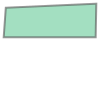

In [65]:
# Coordinates of the Helsinki Senate square in Decimal Degrees
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)
poly

In [66]:
# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly
newdata

,geometry
0,"POLYGON ((24.951 60.169, 24.953 60.169, 24.954..."


In [67]:
# Add a new column and insert data
newdata.loc[0, 'Location'] = 'Senaatintori'
newdata

,geometry,Location
0,"POLYGON ((24.951 60.169, 24.953 60.169, 24.954...",Senaatintori


In [68]:
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84
newdata.crs = from_epsg(4326)

newdata.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Determine the output path for the Shapefile
outfp = r"/home/geo/Data/Senaatintori.shp"

### Write the data into that Shapefile
newdata.to_file(out)

## Grouping data

In [69]:
grouped=data.groupby('BINOMIAL')
print(grouped)

In [153]:
grouped


---

# Part 3
### Objectives

- Do geocoding, i.e. converting addresses into Points (and vice versa)
- Detect the coordinate reference system of your spatial data and define different projections for your datasets (re-project the data)
- Conduct a Point in Polygon queries
- Make spatial and table joins between layers
Sources


## Geocoding

Geocoding, i.e. converting addresses into coordinates or vice versa.
libraries that makes the geocoding really easy. One of the libraries that can do the geocoding for us is geopy that makes it easy to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.
Third-party geocoders list:
- ESRI ArcGIS
- Baidu Maps
- Bing
- geocoder.us
- GeocodeFarm
- GeoNames
- Google Geocoding API (V3)
- IGN France
- Mapquest
- Mapzen Search
- NaviData
- OpenCage
- OpenMapQuest
- Open Street Map Nominatim
- SmartyStreets
- What3words
- Yandex

In [79]:
# Import necessary modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [81]:
address=pd.read_csv("C:\\Users\\abdul\\Downloads\\addresses.txt",sep=';')
address.head()

,id,address
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,1003,"Hermanstads strandsväg 1, 00580 Helsingfors, F..."
4,1004,"Itäväylä, 00900 Helsinki, Finland"


## Re-projecting data

A map projection is a systematic transformation of the latitudes and longitudes into a plain surface. As map projections of gis-layers are fairly often defined differently (i.e. they do not match), it is a common procedure to redefine the map projections to be identical in both layers. It is important that the layers have the same projection as it makes it possible to analyze the spatial relationships between layer, such as conduct the Point in Polygon spatial query

In [85]:
# Check the values in our geometry column
data['geometry'].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [86]:
data_proj=data.copy()
data_proj['geometry']=data_proj['geometry'].to_crs(epsg=3879)
print(data['geometry'].head())
print(data_proj['geometry'].head())

0    POLYGON ((-115.64 29.714, -115.62 29.696, -115...
1    POLYGON ((-105.59 21.893, -105.56 21.851, -105...
2    POLYGON ((-111.16 19.015, -111.16 18.999, -111...
3    POLYGON ((-80.865 -0.77894, -80.759 -0.83337, ...
4    POLYGON ((-67.339 -55.676, -67.338 -55.673, -6...
Name: geometry, dtype: geometry
0    POLYGON ((2.15e+07 1.6e+07, 2.15e+07 1.6e+07, ...
1    POLYGON ((1.99e+07 1.65e+07, 1.99e+07 1.65e+07...
2    POLYGON ((2.05e+07 1.72e+07, 2.05e+07 1.72e+07...
3    POLYGON ((1.28e+07 -1.97e+07, 1.28e+07 -1.96e+...
4    POLYGON ((2.14e+07 -1.02e+07, 2.14e+07 -1.02e+...
Name: geometry, dtype: geometry


In [87]:
# To compare the layers visually

import matplotlib.pyplot as plt

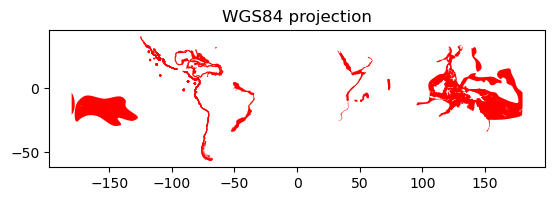

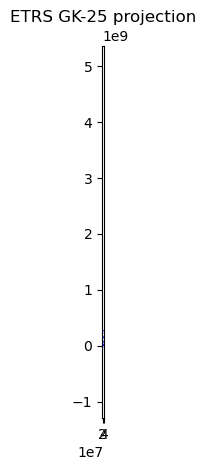

In [88]:
# Plot the WGS84
data.plot(markersize=6, color="red");

# Add title
plt.title("WGS84 projection");

# Pass the coordinate information
data_proj.crs = {'y_0': 0, 'no_defs': True, 'x_0': 25500000, 'k': 1, 'lat_0': 0, 'units': 'm', 'lon_0': 25, 'ellps': 'GRS80', 'proj': 'tmerc'}

# Remove empty white space around the plot
# plt.tight_layout()

# Plot the one with ETRS GK-25 projection
data_proj.plot(markersize=6, color="blue");

# Add title
plt.title("ETRS GK-25 projection");

# Remove empty white space around the plot
plt.tight_layout()

In [89]:
# Pass the coordinate information
data_proj.crs = {'y_0': 0, 'no_defs': True, 'x_0': 25500000, 'k': 1, 'lat_0': 0, 'units': 'm', 'lon_0': 25, 'ellps': 'GRS80', 'proj': 'tmerc'}

# Check that it changed
data_proj.crs

<Projected CRS: +proj=tmerc +y_0=0 +no_defs +x_0=25500000 +k=1 +la ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Transverse Mercator
Datum: Unknown based on GRS 1980 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

---

## Part 4
### Objectives

- Reclassify data based on different criteria (custom or common classifiers).
- Do a simple overlay analysis such as selecting data from one layer based on boundaries of another layer.
- Aggregate data, i.e. merge geometric objects together, based on some common identifier.

## Geometric operations
### Overlay analysis
The aim here is to make an overlay analysis where we select only specific polygon cells from the data based on the borders of municipality of Helsinki.

In [90]:
import geopandas as gpd
import matplotlib.pyplot as plt

# File paths
border_fp = "C:\\Users\\abdul\\Downloads\\data (2)\\data\\Helsinki_borders.shp"
grid_fp = "C:\\Users\\abdul\\Downloads\\data (2)\\data\\TravelTimes_to_5975375_RailwayStation.shp"

# Read files
grid = gpd.read_file(grid_fp)
hel = gpd.read_file(border_fp)

In [91]:
# check the coordinate systems
grid.crs, hel.crs

(<Projected CRS: EPSG:3067>
 Name: ETRS89 / TM35FIN(E,N)
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: Finland - onshore and offshore.
 - bounds: (19.08, 58.84, 31.59, 70.09)
 Coordinate Operation:
 - name: TM35FIN
 - method: Transverse Mercator
 Datum: European Terrestrial Reference System 1989 ensemble
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich,
 <Projected CRS: EPSG:3067>
 Name: ETRS89 / TM35FIN(E,N)
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: Finland - onshore and offshore.
 - bounds: (19.08, 58.84, 31.59, 70.09)
 Coordinate Operation:
 - name: TM35FIN
 - method: Transverse Mercator
 Datum: European Terrestrial Reference System 1989 ensemble
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich)

<Axes: >

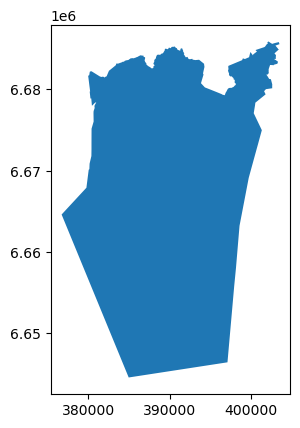

In [92]:
# Plot the datasets
hel.plot()

<Axes: >

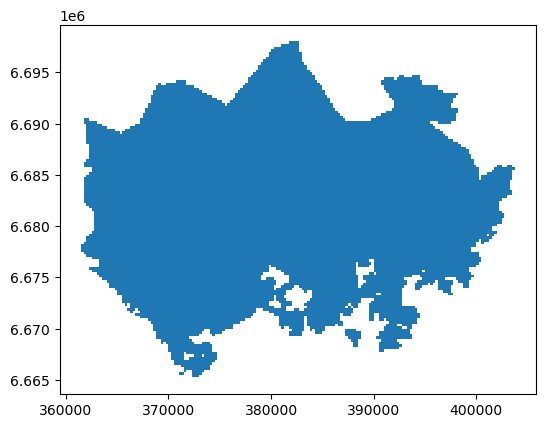

In [93]:
grid.plot()

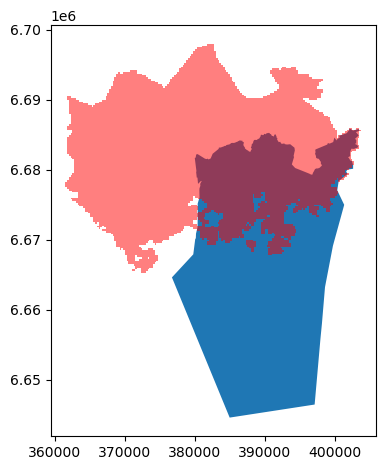

In [94]:
basmemap=hel.plot()
grid.plot(ax=basmemap, color='red', linewidth=0.02, alpha=0.5)
# use tight layout
plt.tight_layout()

<Axes: >

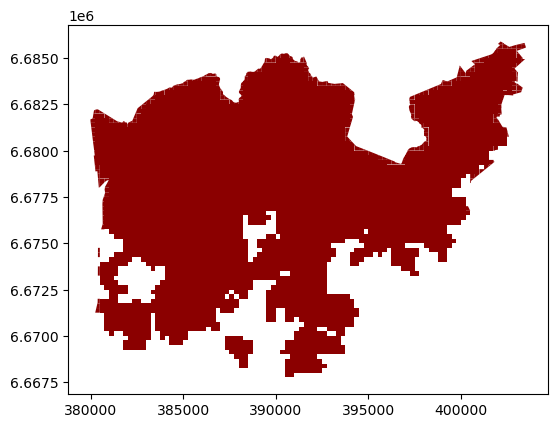

In [95]:
# Overlay analysis
result = gpd.overlay(grid, hel, how='intersection')
result.plot(color='darkred')

In [96]:
# Print the data head
result.head() # Attibutes from both layers inculded

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,29476,41,29483,46,5876274,29990,76,95,24984,77,99,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((4.02e+05 6.69e+06, 4.02e+05 6.69e+06..."
1,29456,41,29462,46,5876275,29866,74,95,24860,75,93,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((4.02e+05 6.69e+06, 4.02e+05 6.69e+06..."
2,36772,50,36778,56,5876278,33541,116,137,44265,130,146,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((4.03e+05 6.69e+06, 4.03e+05 6.69e+06..."
3,36898,49,36904,56,5876279,33720,119,141,44444,132,155,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((4.03e+05 6.69e+06, 4.03e+05 6.69e+06..."
4,29411,40,29418,44,5878128,29944,75,95,24938,76,99,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((4.02e+05 6.69e+06, 4.02e+05 6.69e+06..."


In [97]:
# Length of results
len(result), len(grid), len(hel)

(3826, 13231, 1)

In [103]:
round(result.length.head(),2)

0    650.14
1    357.47
2    229.91
3    491.74
4    327.46
dtype: float64

## Data reclassification
Reclassifying data based on specific criteria is a common task when doing GIS analysis.

### The target in this part of the lesson is to:

- classify the lakes into big and small lakes where

  - a big lake is a lake that is larger than the average size of all lakes in our study region
  - a small lake ^ vice versa
- use travel times and distances to find out
  - good locations to buy an apartment with good - public tranportation accessibility to city center
  - but from a bit further away from city center where the prices are lower (or at least we assume so).
  - use ready made classifiers from pysal -module to classify travel times into multiple classes.

In [105]:
import geopandas as gpd
import matplotlib.pyplot as plt

# File path
fp = "C:\\Users\\abdul\\Downloads\\data (2)\\data\\Corine2012_Uusimaa.shp"

data = gpd.read_file(fp)

In [106]:
# Data preparation
# Select only English columns
selected_cols = ['Level1', 'Level1Eng', 'Level2', 'Level2Eng', 'Level3', 'Level3Eng', 'Luokka3', 'geometry']
# Select data
data = data[selected_cols]
# What are the columns now?
data.columns

Index(['Level1', 'Level1Eng', 'Level2', 'Level2Eng', 'Level3', 'Level3Eng',
       'Luokka3', 'geometry'],
      dtype='object')

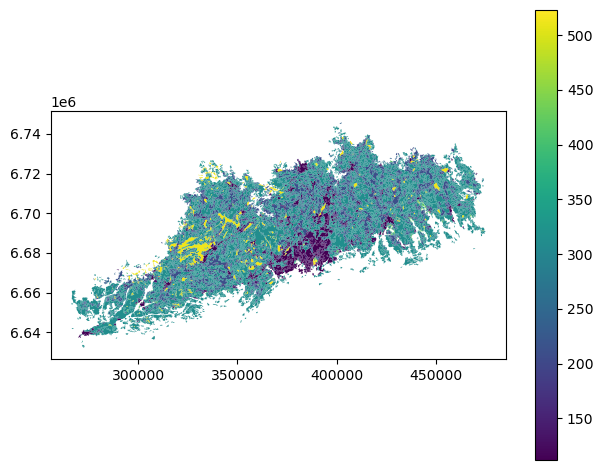

In [107]:
# Plot the data and use 'Level3 as our color
data.plot(column='Level3', legend=True)
plt.tight_layout()

In [108]:
# What values in 'Level3Eng'
list(data['Level3Eng'].unique())

['Discontinuous urban fabric',
 'Transitional woodland/shrub',
 'Non-irrigated arable land',
 'Fruit trees and berry plantations',
 'Pastures',
 'Land principally occupied by agriculture, with significant areas of natural vegetation',
 'Bare rock',
 'Inland marshes',
 'Peatbogs',
 'Salt marshes',
 'Water courses',
 'Water bodies',
 'Sea and ocean',
 'Industrial or commercial units',
 'Road and rail networks and associated land',
 'Port areas',
 'Airports',
 'Mineral extraction sites',
 'Broad-leaved forest',
 'Dump sites',
 'Coniferous forest',
 'Construction sites',
 'Green urban areas',
 'Sport and leisure facilities',
 'Mixed forest']

In [109]:
# Select only lakes by using .loc
lakes = data.loc[data['Level3Eng']=='Water bodies'].copy()
lakes.head()

,Level1,Level1Eng,Level2,Level2Eng,Level3,Level3Eng,Luokka3,geometry
1388,5,Water bodies,51,Inland waters,512,Water bodies,512,"POLYGON ((2.98e+05 6.64e+06, 2.98e+05 6.64e+06..."
1389,5,Water bodies,51,Inland waters,512,Water bodies,512,"POLYGON ((2.87e+05 6.64e+06, 2.87e+05 6.64e+06..."
1390,5,Water bodies,51,Inland waters,512,Water bodies,512,"POLYGON ((3e+05 6.65e+06, 3e+05 6.65e+06, 3e+0..."
1391,5,Water bodies,51,Inland waters,512,Water bodies,512,"POLYGON ((3.01e+05 6.65e+06, 3.01e+05 6.65e+06..."
1392,5,Water bodies,51,Inland waters,512,Water bodies,512,"POLYGON ((3.12e+05 6.65e+06, 3.12e+05 6.65e+06..."


In [110]:
# caluctate the area of lakes
lakes['area'] = lakes.area
lakes['area'].head()


1388    268310.708164
1389    917661.921348
1390    272964.307429
1391    351962.332987
1392    739194.333134
Name: area, dtype: float64

In [111]:
# In square meter
lakes['area_km^2']= lakes['area']/1000000
lakes['area_km^2'].head()

1388    0.268311
1389    0.917662
1390    0.272964
1391    0.351962
1392    0.739194
Name: area_km^2, dtype: float64

In [112]:
# Area mean()
lake_mean_area=lakes['area_km^2'].mean()
lake_mean_area

1.5828513727796714

## Creating a custom classifier
Let’s create a function where we classify the geometries into two classes based on a given threshold -parameter. If the area of a polygon is lower than the threshold value (average size of the lake), the output column will get a value 0, if it is larger, it will get a value 1

In [113]:
# Create empty column for our classification
lakes['small_big']=None

# Create a function for our classification task
def binary_classifier(row, souce_col, threshold):
    if row[souce_col]<threshold:
        return 0
    else:
        return 1

In [114]:
lakes['small_big']=lakes.apply(binary_classifier, axis=1, souce_col='area_km^2', threshold=lake_mean_area)

<Axes: >

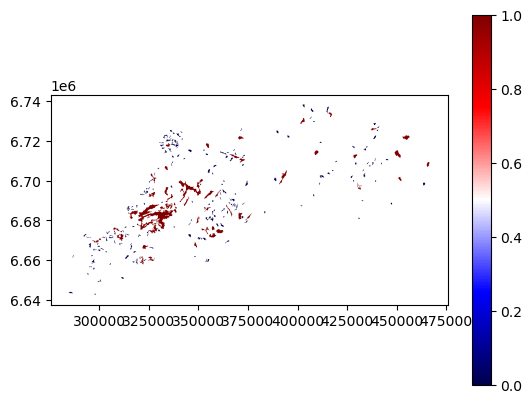

In [115]:
lakes.plot(column='small_big', cmap='seismic', linewidth=0.05, legend=True)

## Classification based on common classifiers
Pysal -module is an extensive Python library including various functions and tools to do spatial data analysis. It also includes all of the most common data classifiers that are used commonly e.g. when visualizing data. Available map classifiers in pysal -module are (see here for more details):

- Box_Plot
- Equal_Interval
- Fisher_Jenks
- Fisher_Jenks_Sampled
- HeadTail_Breaks
- Jenks_Caspall
- enks_Caspall_Forced
- Jenks_Caspall_Sampled
- Max_P_Classifier
- Maximum_Breaks
- Natural_Breaks
- Quantiles
- Percentiles
- Std_Mean
- User_Defined

---

## Part 5
Create beautiful maps in Python and  share them on GitHub using GitHub Pages.

- Matplotlib (static maps, integrated into Geopandas)
- Bokeh (interactive plots)
- Folium (interactive Web maps on Leaflet)
- mplleaflet (converts Matplotlib plots easily to interactive Leaflet maps)
- Basemap (Matplotlib’s own mapping module)
- GeoViews

## Objectives
- Create a static map using Geopandas
- Create a simple interactive map using either Bokeh or Folium (or both).
- Share your maps (static / interactive) on GitHub using GitHub pages.

## Static maps

In [116]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Filepaths
grid_fp = r"C:\\Users\\abdul\\Downloads\\dataE5\\dataE5\\TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = r"C:\\Users\\abdul\\Downloads\\dataE5\\dataE5\\roads.shp"
metro_fp = r"C:\\Users\\abdul\\Downloads\\dataE5\\dataE5\metro.shp"

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [117]:
# Get the CRS of the grid
gridCRS = grid.crs

# Reproject geometries using the crs of travel time grid
roads['geometry'] = roads['geometry'].to_crs(crs=gridCRS)
metro['geometry'] = metro['geometry'].to_crs(crs=gridCRS)

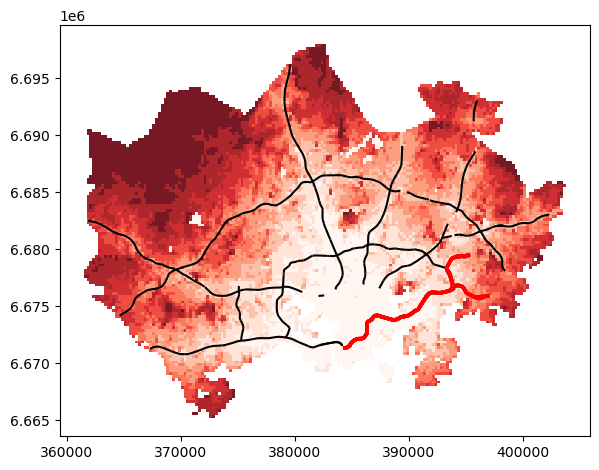

In [118]:
# Visualize the travel times into 9 classes using "Quantiles" classification scheme
# Add also a little bit of transparency with `alpha` parameter
# (ranges from 0 to 1 where 0 is fully transparent and 1 has no transparency)
my_map = grid.plot(column="car_r_t", linewidth=0.03, cmap="Reds", scheme="quantiles", k=9, alpha=0.9)

# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=my_map, color="black", linewidth=1.5)

# Add metro on top of the previous map
metro.plot(ax=my_map, color="red", linewidth=2.5)

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 300 dpi
# outfp = r"/home/geo/data/static_map.png"
# plt.savefig(outfp, dpi=300)

## Interactive maps

### Bokeh

In [119]:
from bokeh.plotting import figure, save

In [120]:
# Initialize the plot (p) and give it a title
p = figure(title="My first interactive plot!")
p

figure(id='p1001', ...)

In [121]:
# Create a list of x-coordinates
x_coords = [0,1,2,3,4]

# Create a list of y-coordinates
y_coords = [5,4,1,2,0]

Note:

In Bokeh drawing points, lines or polygons are always done using list(s) of x and y coordinates.

In [123]:
# Plot the points
p.scatter(x=x_coords, y=y_coords, size=10, color="red")

GlyphRenderer(id='p1055', ...)

Finally, we can save our interactive plot into the disk with save -function that we imported in the beginning. All interactive plots are typically saved as html files which you can open in a web-browser.

In [146]:
# Give output filepath
outfp = r"C:\\Users\\abdul\\Downloads\\dataE5\\dataE5\\points.html"

# Save the plot by passing the plot -object and output path
save(obj=p, filename=outfp)

C:\Users\abdul\AppData\Local\Temp\ipykernel_1808\3336279559.py:5: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(obj=p, filename=outfp)
C:\Users\abdul\AppData\Local\Temp\ipykernel_1808\3336279559.py:5: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(obj=p, filename=outfp)


'C:\\Users\\abdul\\Downloads\\dataE5\\dataE5\\points.html'

# Give output filepath
outfp = r"/content/points.html"

# Save the plot by passing the plot -object and output path
save(obj=p, filename=outfp)

## Creating interactive maps using Bokeh and Geopandas

Creating an interactive Bokeh map from Shapefile(s) contains typically following steps:

- Read the Shapefile into GeoDataFrame
- Calculate the x and y coordinates of the geometries into separate columns
- Convert the GeoDataFrame into a Bokeh DataSource
- Plot the x and y coordinates as points, lines or polygons (which are in Bokeh words: circle, multi_line and patches)

In [137]:
# File path
points_fp = r"C:\\Users\\abdul\\Downloads\\dataE5\\dataE5\\addresses.shp"

# Read the data
points = gpd.read_file(points_fp)

In [138]:
points.head()

,address,id,geometry
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,POINT (24.93 60.168)
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,POINT (24.942 60.17)
2,"Hermanstads strandsväg 1, 00580 Helsingfors, F...",1003,POINT (24.977 60.187)
3,"Itäväylä, 00900 Helsinki, Finland",1004,POINT (25.092 60.214)
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,POINT (24.921 60.157)


Create afunction called getPointCoords() which will return the x or y coordinate of a given geometry. It shall have two parameters: geom and coord_type where the first one should be a Shapely geometry object and coord_type should be either 'x' or 'y'.

In [139]:
def getPointCoords(row, geom, coord_type):
    """Calculates coordinates ('x' or 'y') of a Point geometry"""
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y

In [140]:
# Calculate x coordinates
points['x'] = points.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)

# Calculate y coordinates
points['y'] = points.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

points.head()

,address,id,geometry,x,y
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,POINT (24.93 60.168),24.930170,60.168373
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,POINT (24.942 60.17),24.941893,60.169866
2,"Hermanstads strandsväg 1, 00580 Helsingfors, F...",1003,POINT (24.977 60.187),24.977400,60.187359
3,"Itäväylä, 00900 Helsinki, Finland",1004,POINT (25.092 60.214),25.091964,60.214481
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,POINT (24.921 60.157),24.921485,60.156578


Note:

Bokeh ColumnDataSource do not understand Shapely geometry -objects. Thus, we need to remove the geometry -column before convert our DataFrame into a ColumnDataSouce.

In [141]:
p_df=points.drop('geometry', axis=1).copy()
p_df.head()

,address,id,x,y
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,24.930170,60.168373
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,24.941893,60.169866
2,"Hermanstads strandsväg 1, 00580 Helsingfors, F...",1003,24.977400,60.187359
3,"Itäväylä, 00900 Helsinki, Finland",1004,25.091964,60.214481
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,24.921485,60.156578


In [142]:
# Convert  pandas DataFrame into a ColumnDataSource
from bokeh.models import ColumnDataSource
psource = ColumnDataSource(p_df)
psource

ColumnDataSource(id='p1202', ...)

In [143]:
# Initialize our plot figure
p = figure(title="A map of address points from a Shapefile")

# Add the points to the map from our 'psource' ColumnDataSource -object
p.scatter('x', 'y', source=psource, color='red', size=10)

# Output filepath
outfp = r"C:\\Users\\abdul\\Downloads\\dataE5\\dataE5\\points_map.html"

# Save the map
save(p, outfp)

C:\Users\abdul\AppData\Local\Temp\ipykernel_1808\4197634704.py:11: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(p, outfp)
C:\Users\abdul\AppData\Local\Temp\ipykernel_1808\4197634704.py:11: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(p, outfp)


'C:\\Users\\abdul\\Downloads\\dataE5\\dataE5\\points_map.html'

In [144]:
# Adding interactivity to the map
from bokeh.models import HoverTool

In [145]:
# Initialize tools
my_hover = HoverTool()

# Tell the HoverTool what informaation it should show
my_hover.tooltips = [('Address of the point', '@address')]

# Add the tool into our plot
p.add_tools(my_hover)

# File path
outfp = r"C:\\Users\\abdul\\Downloads\\dataE5\\dataE5\\points_map_hoover.html"

save(p, outfp)

C:\Users\abdul\AppData\Local\Temp\ipykernel_1808\2757683203.py:13: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(p, outfp)
C:\Users\abdul\AppData\Local\Temp\ipykernel_1808\2757683203.py:13: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(p, outfp)


'C:\\Users\\abdul\\Downloads\\dataE5\\dataE5\\points_map_hoover.html'